## 01 Exploratory Data Analysis
## Objetivo
Realizar un análisis exploratorio de los datos (EDA) para entender las características del dataset y detectar patrones, anomalías y relaciones entre las variables.



### **Organización de los Datos**
El conjunto de datos consta de dos tablas fundamentales. En primer lugar, contamos con la "Tabla de Transacciones", que ofrece información detallada sobre cada transacción realizada. En segundo lugar, encontramos la "Tabla de Identidad", la cual proporciona datos cruciales relacionados con la conexión de red, incluyendo información como la dirección IP, proveedor de servicios de Internet (ISP), el uso de proxy, entre otros.

Esta estructura dual del conjunto de datos permite una comprensión integral de las transacciones al incorporar tanto los detalles transaccionales como la identidad digital asociada, enriqueciendo así el análisis y la interpretación de la información.

In [25]:
## Librerías 
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
## directorio de los datasets
data_dir = '../data/raw/ieee-fraud-detection'
## Lista de los archivos descargados
!ls -lh {data_dir}

total 1.3G
-rw-rw-r-- 1 joseph joseph 5.8M Dec 11  2019 sample_submission.csv
-rw-rw-r-- 1 joseph joseph  25M Dec 11  2019 test_identity.csv
-rw-rw-r-- 1 joseph joseph 585M Dec 11  2019 test_transaction.csv
-rw-rw-r-- 1 joseph joseph  26M Dec 11  2019 train_identity.csv
-rw-rw-r-- 1 joseph joseph 652M Dec 11  2019 train_transaction.csv


In [3]:

files = ['train_transaction.csv', 'train_identity.csv', 'test_transaction.csv', 'test_identity.csv']

for file in files:
    file_path = os.path.join(data_dir, file)
    with open(file_path, 'r') as f:
        line_count = sum(1 for line in f)
    print(f'{file} tiene {line_count} líneas')


train_transaction.csv tiene 590541 líneas
train_identity.csv tiene 144234 líneas
test_transaction.csv tiene 506692 líneas
test_identity.csv tiene 141908 líneas


**Observación:**

Los datos de entrenamientos son más de un millon de registro, por lo tanto se toma una fracción de los registro de entrenamiento para este trabajo para facilitar el análisis y el entrenamiento del modelo.


### **Características Categóricas - Tabla Identity**

Las variables en esta tabla incluyen información de identidad, abarcando detalles de la conexión de red (IP, ISP, Proxy, etc.) y la firma digital (UA/navegador/sistema operativo/versión, etc.) asociada con las transacciones. Estos datos son recopilados por el sistema de protección contra fraudes de Vesta y socios de seguridad digital. (Los nombres de los campos están enmascarados y no se proporcionará un diccionario emparejado por razones de privacidad y acuerdo contractual).

- DeviceType
- DeviceInfo
- id_12 - id_38

Se realiza una fusión de ambas tablas para construir un único marco de datos. Además, procederemos a seleccionar una porción específica de este marco de datos, ya que, en esta primera fase del análisis, no es necesario utilizar todos los registros. Al final, emplearemos la totalidad de los datos.

### Selección de Porción del Dataset con Muestreo Estratificado

Para seleccionar una porción representativa de un dataset grande para entrenamiento sin introducir sesgo, se utiliza el muestreo aleatorio estratificado. Este método asegura que la proporción de clases en la muestra sea la misma que en el conjunto de datos original, lo cual es crucial para problemas de clasificación con clases desbalanceadas.


In [4]:
select_col_transaction = 'TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9'.split(',')
select_col_identity = 'TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo'.split(',')
select_col_transaction_test = 'TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9'.split(',')
select_col_identity_test ='TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo'.split(',')

In [5]:
data_dir

'../data/raw/ieee-fraud-detection'

In [6]:
## dataset de entrenamiento
seed = 42
# Cargar los datos
df_transaction_train = pd.read_csv(data_dir + '/train_transaction.csv', usecols=select_col_transaction)
df_identity_train = pd.read_csv(data_dir + '/train_identity.csv', usecols=select_col_identity)

# Combinar los datasets
dataset = pd.merge(df_transaction_train, df_identity_train, on='TransactionID', how='left')

# Realizar el muestreo estratificado
train_data, _ = train_test_split(dataset, stratify=dataset['isFraud'], test_size=0.9, random_state=seed)

# Mostrar la información del dataset resultante
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59054 entries, 294161 to 404259
Data columns (total 95 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   59054 non-null  int64  
 1   isFraud         59054 non-null  int64  
 2   TransactionDT   59054 non-null  int64  
 3   TransactionAmt  59054 non-null  float64
 4   ProductCD       59054 non-null  object 
 5   card1           59054 non-null  int64  
 6   card2           58127 non-null  float64
 7   card3           58896 non-null  float64
 8   card4           58896 non-null  object 
 9   card5           58658 non-null  float64
 10  card6           58896 non-null  object 
 11  addr1           52441 non-null  float64
 12  addr2           52441 non-null  float64
 13  dist1           23737 non-null  float64
 14  dist2           3818 non-null   float64
 15  P_emaildomain   49586 non-null  object 
 16  R_emaildomain   13850 non-null  object 
 17  C1              59054 non-null

### Dimensiones del dataset 

In [7]:
train_data.shape

(59054, 95)

Por lo que utilizaremos solo el 10% del dato de entrenamiento

## **Consideraciones Iniciales**
En la fase inicial de nuestro análisis, nos enfrentamos a una abrumadora cantidad de columnas. Con el objetivo de simplificar y focalizarnos en esta etapa inicial, buscaremos reducir el conjunto de columnas al máximo posible.

### Características Iniciales para el Análisis de Primera Etapa
1. **TransactionDT:** Representa un delta de tiempo desde un punto de referencia.
2. **TransactionAMT:** Indica la cantidad en USD para el pago de la transacción.
3. **ProductCD:** Código del producto.
4. **addr:** Dirección.
5. **dist:** Distancia.
6. **P_ and (R__):** Dominio de correo electrónico del comprador y del destinatario.
7. **deviceType**
8. **DeviceInfo**

Las siguientes características no se incluirán en esta fase inicial:
- **C1-C14:** Recuento, como la cantidad de direcciones asociadas a la tarjeta de pago, entre otros. El significado real está enmascarado.
- **D1-D15:** Timedelta, como los días entre la transacción anterior, etc.
- **M1-M9:** Coincidencias, como los nombres en la tarjeta y la dirección, etc.
- **Vxxx:** Características ricas desarrolladas por Vesta, que incluyen ranking, conteo y relaciones con otras entidades.

id_12 - id_38


In [8]:
## Armamos un nuevo dataset con menos cantidad de columnas
df_train = train_data[['isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD','addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'DeviceType', 'DeviceInfo']].copy()

In [9]:
df_train.shape

(59054, 12)

Por lo tanto tenemos 11 columnas de propiedades y 59054 registros 

### Tipos de datos y resumen estadísticos

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59054 entries, 294161 to 404259
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isFraud         59054 non-null  int64  
 1   TransactionDT   59054 non-null  int64  
 2   TransactionAmt  59054 non-null  float64
 3   ProductCD       59054 non-null  object 
 4   addr1           52441 non-null  float64
 5   addr2           52441 non-null  float64
 6   dist1           23737 non-null  float64
 7   dist2           3818 non-null   float64
 8   P_emaildomain   49586 non-null  object 
 9   R_emaildomain   13850 non-null  object 
 10  DeviceType      14172 non-null  object 
 11  DeviceInfo      11958 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 5.9+ MB


In [11]:
import pandas as pd

# Suponiendo que ya tienes cargado tu dataset en 'df_train'

# Identificar tipos de datos
data_types = df_train.drop('isFraud',axis=1).dtypes

# Filtrar y contar variables numéricas y categóricas
num_vars = data_types[data_types != 'object']  # Variables numéricas
cat_vars = data_types[data_types == 'object']  # Variables categóricas

# Obtener nombres de las variables
num_vars_names = num_vars.index.tolist()
cat_vars_names = cat_vars.index.tolist()

# Mostrar resultados
print(f"Número de variables numéricas: {num_vars.shape[0]}")
print(f"Nombres de variables numéricas: {num_vars_names}")
print()
print(f"Número de variables categóricas: {cat_vars.shape[0]}")
print(f"Nombres de variables categóricas: {cat_vars_names}")


Número de variables numéricas: 6
Nombres de variables numéricas: ['TransactionDT', 'TransactionAmt', 'addr1', 'addr2', 'dist1', 'dist2']

Número de variables categóricas: 5
Nombres de variables categóricas: ['ProductCD', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo']


In [12]:
for columna in cat_vars_names :
    print(f"Columna: {columna}, el número de variables es: {df_train[columna].nunique()}")

Columna: ProductCD, el número de variables es: 5
Columna: P_emaildomain, el número de variables es: 59
Columna: R_emaildomain, el número de variables es: 57
Columna: DeviceType, el número de variables es: 2
Columna: DeviceInfo, el número de variables es: 794


## Análisis de valores nulos

### Identificación de valores nulos

In [13]:
df_train.isnull().sum()

isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
addr1              6613
addr2              6613
dist1             35317
dist2             55236
P_emaildomain      9468
R_emaildomain     45204
DeviceType        44882
DeviceInfo        47096
dtype: int64

### Porcentaje de valores nulos

In [14]:
null_percentages = (df_train.isnull().sum() / len(df_train)) * 100
print(round(null_percentages,2))

isFraud            0.00
TransactionDT      0.00
TransactionAmt     0.00
ProductCD          0.00
addr1             11.20
addr2             11.20
dist1             59.80
dist2             93.53
P_emaildomain     16.03
R_emaildomain     76.55
DeviceType        76.00
DeviceInfo        79.75
dtype: float64


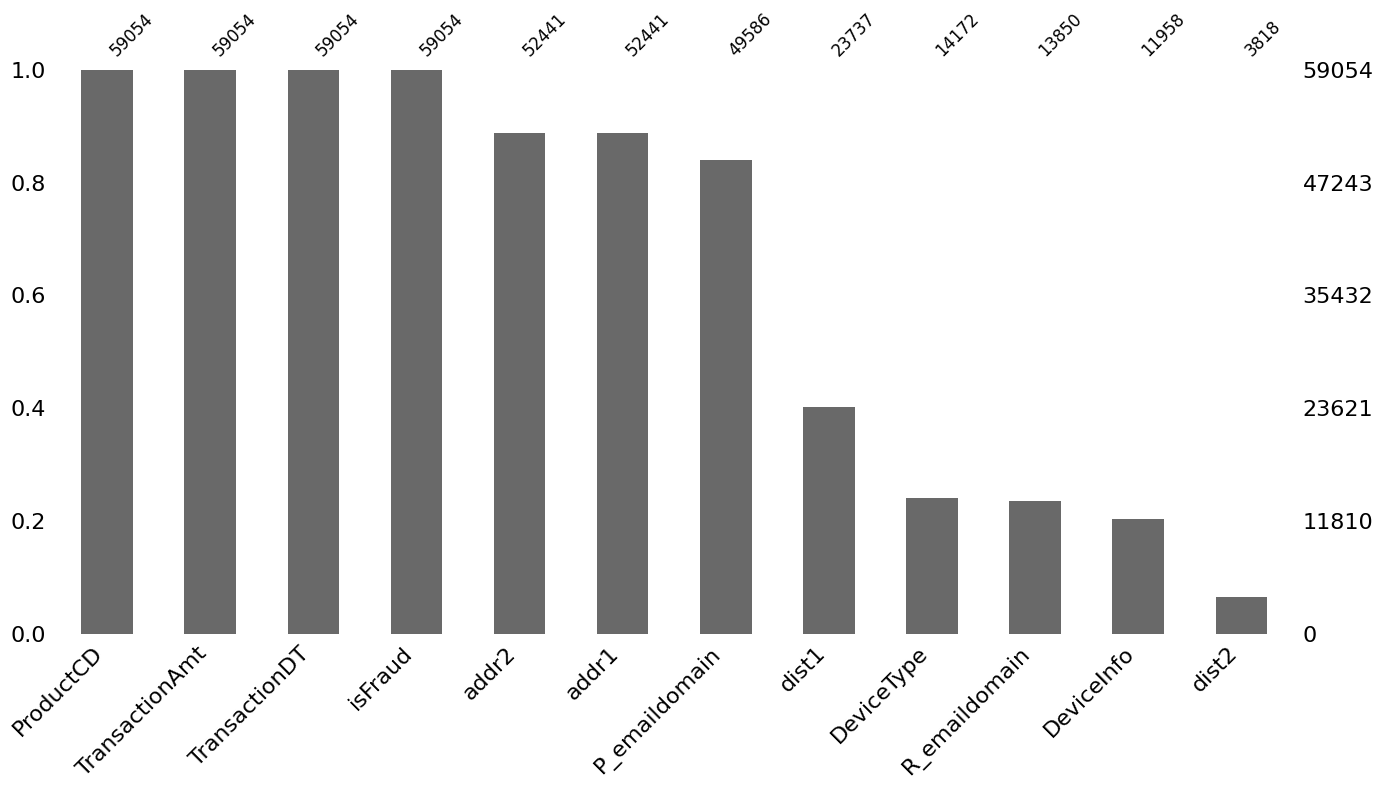

In [15]:
import matplotlib.pyplot as plt


# Crear la figura con el tamaño deseado
plt.figure(figsize=(14, 8))

# Generar el gráfico de barras de valores nulos
msno.bar(df_train, sort='descending')

# Ajustar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Obtener la figura actual y ajustar el tamaño
fig = plt.gcf()
fig.set_size_inches(14, 8)  # Asegurarse de que el tamaño de la figura sea adecuado

# Ajustar los márgenes para evitar que las etiquetas se recorten
plt.tight_layout()

# Guardar la figura en un archivo PNG
#plt.savefig(base_dir + 'nulos.png')

# Mostrar la figura
plt.show()


En el gráfico de arriba se presenta una visualización de la cantidad de valores nulos en forma descendente. Destacan especialmente cinco atributos con una significativa cantidad de valores nulos: 'dist1', 'DeviceType', 'R_emaildomain', 'DeviceInfo' y 'dist2'. Esta distribución nos ofrece una instantánea clara de las áreas de nuestros datos que pueden requerir mayor atención y manejo especial durante el proceso de limpieza y preparación de los datos.

In [21]:
df_nulls.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'addr1',
       'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

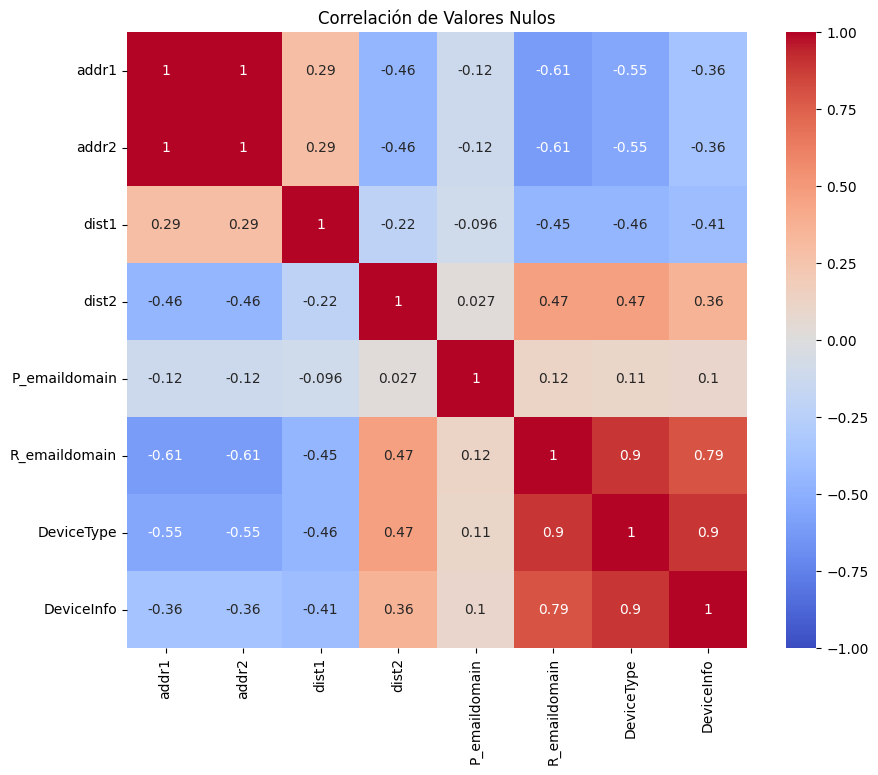

In [22]:
df_nulls = df_train.isnull().drop(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD'],axis=1)

# Calcular la correlación entre los valores nulos
corr_nulls = df_nulls.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_nulls, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de Valores Nulos')
plt.show()

In [27]:


# Suponiendo que ya tienes cargado tu dataset en 'df_train'

# Crear una nueva DataFrame booleano indicando valores nulos
df_nulls = df_train.isnull()

# Calcular la correlación entre los valores nulos
corr_nulls = df_nulls.corr()

# Obtener triángulo superior de la matriz de correlación (sin la diagonal principal)
upper_triangle = corr_nulls.where(np.triu(np.ones(corr_nulls.shape), k=1).astype(bool))

# Definir umbral de correlación
threshold = 0.5

# Filtrar pares de variables con correlación mayor que el umbral
high_corr_pairs = upper_triangle[upper_triangle.abs() > threshold].stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar los pares de variables con alta correlación ordenados por la correlación
high_corr_pairs_sorted = high_corr_pairs.sort_values(by='Correlación', ascending=False)
print(high_corr_pairs_sorted)


      Variable 1     Variable 2  Correlación
0          addr1          addr2     1.000000
5  R_emaildomain     DeviceType     0.897175
7     DeviceType     DeviceInfo     0.896130
6  R_emaildomain     DeviceInfo     0.793478
2          addr1     DeviceType    -0.549595
4          addr2     DeviceType    -0.549595
3          addr2  R_emaildomain    -0.611382
1          addr1  R_emaildomain    -0.611382


En la tabla anterior, se observa que los datos nulos muestran una correlación significativa entre ellos, con valores superiores a 0.5 en términos absolutos. Por ejemplo, addr1 y addr2, que representan la región y el país de facturación respectivamente para el comprador, muestran una posible relación de nulidad entre sí, dado que ambos son atributos de la dirección del comprador.

Todas las demás variables también muestran una alta correlación de datos nulos, reflejada en la gran cantidad de valores ausentes para cada variable, lo cual contribuye a un alto valor de correlación entre ellas.

### Correlación de valores perdidos entre columnas